<a href="https://colab.research.google.com/github/RadnuST/AIML/blob/main/Reddit_Califonia_fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: CONNECT DRIVE

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import nltk
nltk.data.path.append('/content/drive/MyDrive/AIML files/Reddit Califonia/data_01.csv')
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Load the data file
file_path = "/content/drive/MyDrive/AIML files/Reddit Califonia/data_01.csv"
df = pd.read_csv(file_path)

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Check if 'body' column exists
if 'body' in df.columns:
    # Apply VADER to the 'body' column
    df['sentiment_scores'] = df['body'].astype(str).apply(sia.polarity_scores)

    # Extract individual sentiment components
    df['compound'] = df['sentiment_scores'].apply(lambda x: x['compound'])
    df['positive'] = df['sentiment_scores'].apply(lambda x: x['pos'])
    df['neutral'] = df['sentiment_scores'].apply(lambda x: x['neu'])
    df['negative'] = df['sentiment_scores'].apply(lambda x: x['neg'])

    # Save output to CSV
    output_path = "/content/drive/MyDrive/AIML files/Reddit Califonia/vader_sentiment_analysis.csv"
    df[['body', 'compound', 'positive', 'neutral', 'negative']].to_csv(output_path, index=False)
    print(f"Output saved to {output_path}")
else:
    print("The 'body' column is missing in the uploaded file.")


Output saved to /content/drive/MyDrive/AIML files/Reddit Califonia/vader_sentiment_analysis.csv


In [ ]:
# prompt: df.colum

df.columns


Index(['body', 'dataType', 'imageUrls/0', 'link', 'numberOfComments', 'title',
       'url', 'sentiment_scores', 'compound', 'positive', 'neutral',
       'negative'],
      dtype='object')

In [ ]:
# prompt: drop all colums other than body	compound	positive	neutral	negative

import pandas as pd

# Load the data file
file_path = "/content/drive/MyDrive/AIML files/Reddit Califonia/vader_sentiment_analysis.csv"  # Assuming the output from the previous code
df = pd.read_csv(file_path)

# Select only the desired columns
df = df[['body', 'compound', 'positive', 'neutral', 'negative']]




In [ ]:
df.head()

,body,compound,positive,neutral,negative
0,"Location 39°45'27""N 121°37'22""W\n\nThe 2018 Ca...",-0.9790,0.061,0.712,0.227
1,My ex friend's boyfriend's grandmother died in...,-0.4215,0.177,0.573,0.250
2,I'm so sorry to hear that. May they rest in pe...,0.4417,0.248,0.639,0.113
3,I remember hearing those reports. People tryin...,-0.5719,0.077,0.724,0.199
4,Lost mine and all my friends and families home...,-0.1531,0.097,0.755,0.148


In [ ]:
import pandas as pd

def categorize_compound(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to create the new column
df['Compound category'] = df['compound'].apply(categorize_compound)



In [ ]:
df.head()

,body,compound,positive,neutral,negative,Compound category
0,"Location 39°45'27""N 121°37'22""W\n\nThe 2018 Ca...",-0.9790,0.061,0.712,0.227,Negative
1,My ex friend's boyfriend's grandmother died in...,-0.4215,0.177,0.573,0.250,Negative
2,I'm so sorry to hear that. May they rest in pe...,0.4417,0.248,0.639,0.113,Positive
3,I remember hearing those reports. People tryin...,-0.5719,0.077,0.724,0.199,Negative
4,Lost mine and all my friends and families home...,-0.1531,0.097,0.755,0.148,Negative


In [ ]:
df.shape

(8849, 6)

In [ ]:
# prompt: check for null

# Check for null values in specific columns
null_counts = df.isnull().sum()
print(null_counts)

# Or check for null values in the entire DataFrame
print(df.isnull().values.any())


body                 14
compound              0
positive              0
neutral               0
negative              0
Compound category     0
dtype: int64
True


In [ ]:
# prompt: remove null

import pandas as pd
# Load the data file
file_path = "/content/drive/MyDrive/AIML files/Reddit Califonia/vader_sentiment_analysis.csv"  # Assuming the output from the previous code
df = pd.read_csv(file_path)

# Select only the desired columns
df = df[['body', 'compound', 'positive', 'neutral', 'negative']]

# Remove rows with null values in any of the selected columns
df = df.dropna()

def categorize_compound(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to create the new column
df['Compound category'] = df['compound'].apply(categorize_compound)

df.head()

# Check for null values again to verify removal
print(df.isnull().sum())
print(df.isnull().values.any())


body                 0
compound             0
positive             0
neutral              0
negative             0
Compound category    0
dtype: int64
False


In [ ]:
df.shape

(8835, 6)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load the data file
file_path = "/content/drive/MyDrive/AIML files/Reddit Califonia/vader_sentiment_analysis.csv"  # Assuming the output from the previous code
df = pd.read_csv(file_path)

# Select only the desired columns
df = df[['body', 'compound', 'positive', 'neutral', 'negative']]

# Remove rows with null values in any of the selected columns
df = df.dropna()

def categorize_compound(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to create the new column
df['Compound category'] = df['compound'].apply(categorize_compound)
# Tokenizing the text data
vectorizer = TfidfVectorizer(stop_words='english', max_features=500000)  # Adjust max_features if needed
X = vectorizer.fit_transform(df['body'])

# Encoding target variable
y = df['Compound category'].map({'Positive': 1, 'Negative': 0, 'Neutral': 2})  # Convert categories to numbers

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Training the logistic regression model
model_logistic = LogisticRegression(max_iter=500, class_weight='balanced', solver='liblinear')
model_logistic.fit(X_train, y_train)

# Predictions
y_pred = model_logistic.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7209960384833051

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.73      0.73       685
           1       0.76      0.74      0.75       628
           2       0.67      0.69      0.68       454

    accuracy                           0.72      1767
   macro avg       0.72      0.72      0.72      1767
weighted avg       0.72      0.72      0.72      1767



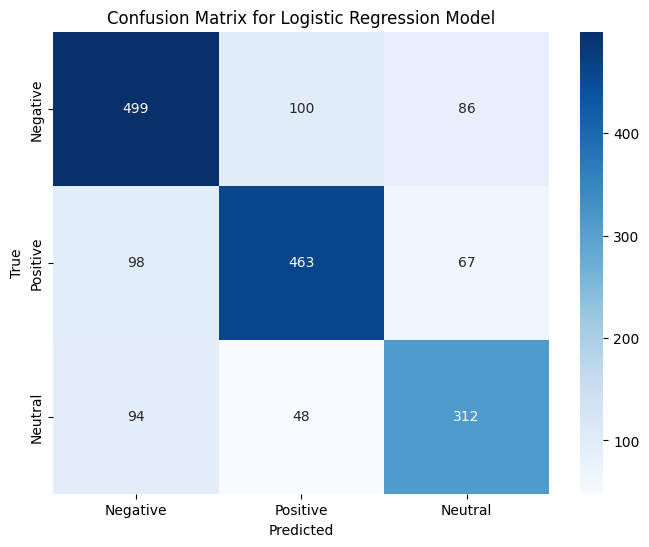

In [ ]:
# prompt: confusion matrix for model_logistic

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined from the previous code

cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive', 'Neutral'],
            yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Logistic Regression Model")
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load the data file
file_path = "/content/drive/MyDrive/AIML files/Reddit Califonia/vader_sentiment_analysis.csv"  # Assuming the output from the previous code
df = pd.read_csv(file_path)

# Select only the desired columns
df = df[['body', 'compound', 'positive', 'neutral', 'negative']]

# Remove rows with null values in any of the selected columns
df = df.dropna()

def categorize_compound(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to create the new column
df['Compound category'] = df['compound'].apply(categorize_compound)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=500000)
X = vectorizer.fit_transform(df['body'])  # Convert text to numerical features

# Encode the target variable
y = df['Compound category'].map({'Positive': 1, 'Negative': 0, 'Neutral': 2})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_report = classification_report(y_test, y_pred_svm)

# Print results
print(f"\nSVM Model Accuracy: {svm_accuracy:.4f}")
print("\nClassification Report for SVM:\n", svm_report)


SVM Model Accuracy: 0.7080

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.73      0.71      0.72       685
           1       0.74      0.72      0.73       628
           2       0.63      0.69      0.66       454

    accuracy                           0.71      1767
   macro avg       0.70      0.71      0.70      1767
weighted avg       0.71      0.71      0.71      1767



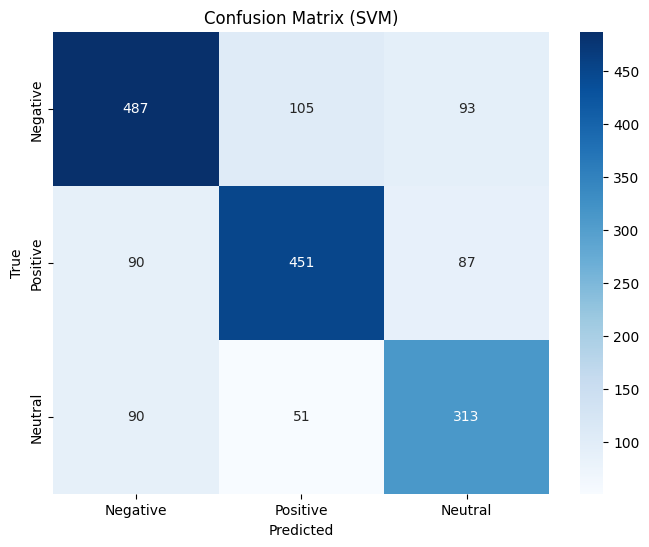

In [ ]:
# prompt: confusion matrix for svm_model

import matplotlib.pyplot as plt
# Create the confusion matrix for the SVM model
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive', 'Neutral'],
            yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (SVM)")
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the data file
file_path = "/content/drive/MyDrive/AIML files/Reddit Califonia/vader_sentiment_analysis.csv"  # Use your dataset path
df = pd.read_csv(file_path)

# Select only the desired columns
df = df[['body', 'compound', 'positive', 'neutral', 'negative']]

# Remove rows with null values in any of the selected columns
df = df.dropna()

# Function to categorize compound sentiment scores
def categorize_compound(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to create the new column
df['Compound category'] = df['compound'].apply(categorize_compound)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=500000)
X = vectorizer.fit_transform(df['body'])  # Convert text to numerical features

# Encode the target variable
y = df['Compound category'].map({'Positive': 1, 'Negative': 0, 'Neutral': 2})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_report = classification_report(y_test, y_pred_dt)

# Print results
print(f"\nDecision Tree Model Accuracy: {dt_accuracy:.4f}")
print("\nClassification Report for Decision Tree:\n", dt_report)


Decision Tree Model Accuracy: 0.6723

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.68      0.62      0.65       685
           1       0.68      0.68      0.68       628
           2       0.65      0.74      0.69       454

    accuracy                           0.67      1767
   macro avg       0.67      0.68      0.67      1767
weighted avg       0.67      0.67      0.67      1767



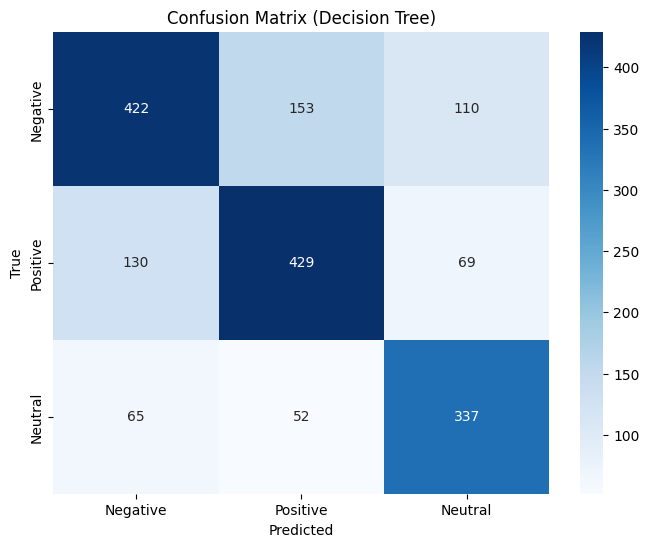

In [ ]:
# prompt: confusion matrix for dt_model

import matplotlib.pyplot as plt
# Create the confusion matrix for the Decision Tree model
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive', 'Neutral'],
            yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Decision Tree)")
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the data file
file_path = "/content/drive/MyDrive/AIML files/Reddit Califonia/vader_sentiment_analysis.csv"  # Use your dataset path
df = pd.read_csv(file_path)

# Select only the desired columns
df = df[['body', 'compound', 'positive', 'neutral', 'negative']]

# Remove rows with null values in any of the selected columns
df = df.dropna()

# Function to categorize compound sentiment scores
def categorize_compound(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to create the new column
df['Compound category'] = df['compound'].apply(categorize_compound)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=500000)
X = vectorizer.fit_transform(df['body'])  # Convert text to numerical features

# Encode the target variable
y = df['Compound category'].map({'Positive': 1, 'Negative': 0, 'Neutral': 2})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)

# Print results
print(f"\nRandom Forest Model Accuracy: {rf_accuracy:.4f}")
print("\nClassification Report for Random Forest:\n", rf_report)


Random Forest Model Accuracy: 0.7153

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.71      0.70      0.70       685
           1       0.77      0.67      0.71       628
           2       0.67      0.81      0.73       454

    accuracy                           0.72      1767
   macro avg       0.72      0.72      0.72      1767
weighted avg       0.72      0.72      0.71      1767



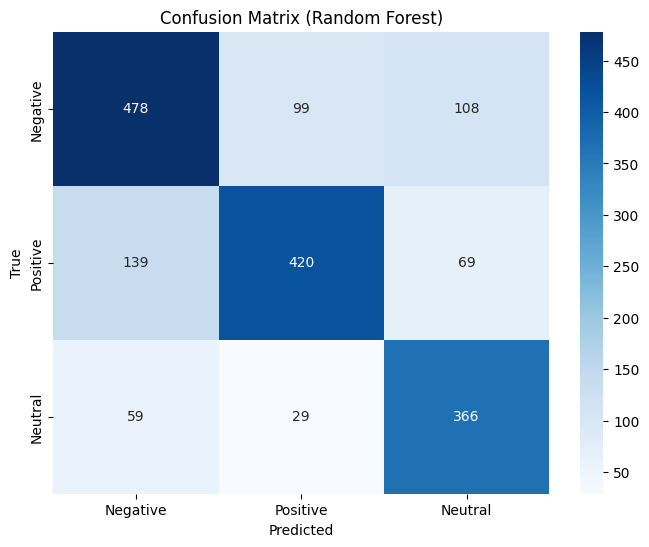

In [ ]:
# prompt: confusion matrix for rf_model

import matplotlib.pyplot as plt
# Create the confusion matrix for the Random Forest model
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive', 'Neutral'],
            yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Random Forest)")
plt.show()


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Accuracy: 0.49122807017543857

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.60      0.54       685
           1       0.46      0.46      0.46       628
           2       0.55      0.37      0.44       454

    accuracy                           0.49      1767
   macro avg       0.50      0.48      0.48      1767
weighted avg       0.50      0.49      0.49      1767



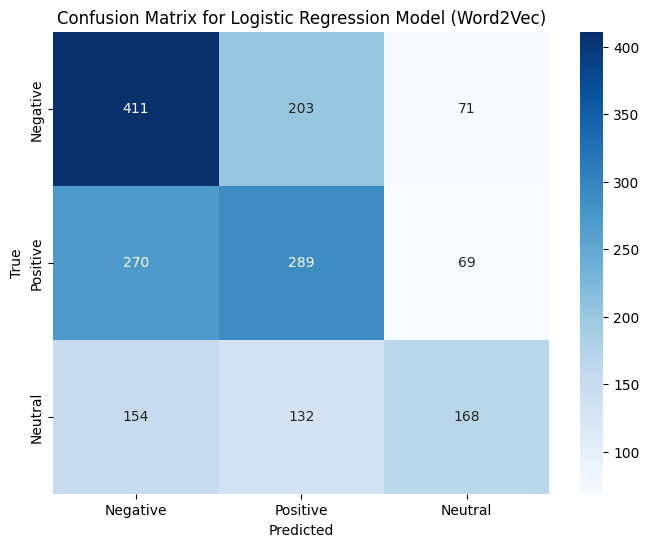

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
import string

# Ensure nltk tokenization resources are available
nltk.download('punkt')

# Load the data file
file_path = "/content/drive/MyDrive/AIML files/Reddit Califonia/vader_sentiment_analysis.csv"  # Adjust path as needed
df = pd.read_csv(file_path)

# Select only the desired columns
df = df[['body', 'compound', 'positive', 'neutral', 'negative']]

# Remove rows with null values in any of the selected columns
df = df.dropna()

# Function to categorize compound sentiment scores
def categorize_compound(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to create the new column
df['Compound category'] = df['compound'].apply(categorize_compound)

# Tokenize the text data for Word2Vec
def preprocess_text(text):
    text = text.lower().translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    try:
        return word_tokenize(text)  # Try using NLTK tokenizer
    except LookupError:
        return text.split()  # Fallback: simple split by space

df['tokenized_body'] = df['body'].apply(preprocess_text)

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=df['tokenized_body'], vector_size=100, window=5, min_count=2, workers=4)

# Function to get sentence vectors (average of word vectors)
def get_sentence_vector(words, model, vector_size=100):
    vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size)

# Convert text to numerical vectors
X = np.array([get_sentence_vector(words, word2vec_model) for words in df['tokenized_body']])

# Encode the target variable
y = df['Compound category'].map({'Positive': 1, 'Negative': 0, 'Neutral': 2})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train Logistic Regression model
model_logistic1 = LogisticRegression(max_iter=500, class_weight='balanced', solver='liblinear')
model_logistic1.fit(X_train, y_train)

# Make predictions
y_pred = model_logistic1.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Assuming y_test and y_pred are already defined from the previous code

cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive', 'Neutral'],
            yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Logistic Regression Model (Word2Vec)")
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Accuracy: 0.48613469156762873

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.60      0.53       685
           1       0.44      0.50      0.47       628
           2       0.63      0.30      0.41       454

    accuracy                           0.49      1767
   macro avg       0.52      0.47      0.47      1767
weighted avg       0.51      0.49      0.48      1767



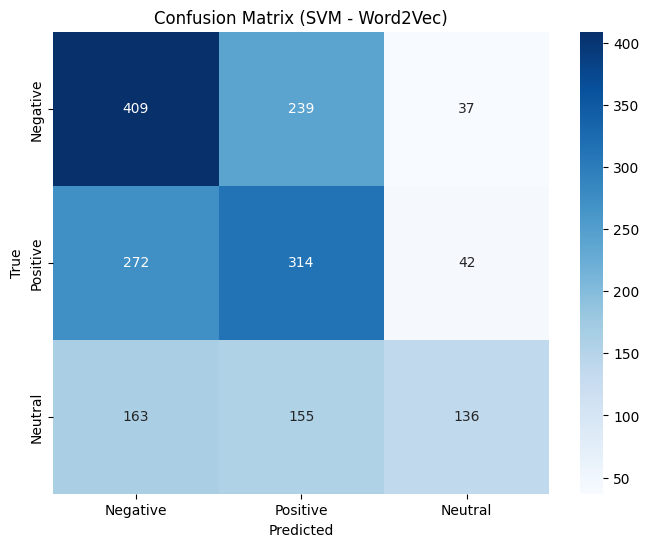

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
import string

# Ensure nltk tokenization resources are available
nltk.download('punkt')

# Load the data file
file_path = "/content/drive/MyDrive/AIML files/Reddit Califonia/vader_sentiment_analysis.csv"  # Adjust path as needed
df = pd.read_csv(file_path)

# Select only the desired columns
df = df[['body', 'compound', 'positive', 'neutral', 'negative']]

# Remove rows with null values in any of the selected columns
df = df.dropna()

# Function to categorize compound sentiment scores
def categorize_compound(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to create the new column
df['Compound category'] = df['compound'].apply(categorize_compound)

# Tokenize the text data for Word2Vec
def preprocess_text(text):
    text = text.lower().translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    try:
        return word_tokenize(text)  # Try using NLTK tokenizer
    except LookupError:
        return text.split()  # Fallback: simple split by space

df['tokenized_body'] = df['body'].apply(preprocess_text)

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=df['tokenized_body'], vector_size=100, window=5, min_count=2, workers=4)

# Function to get sentence vectors (average of word vectors)
def get_sentence_vector(words, model, vector_size=100):
    vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size)

# Convert text to numerical vectors
X = np.array([get_sentence_vector(words, word2vec_model) for words in df['tokenized_body']])

# Encode the target variable
y = df['Compound category'].map({'Positive': 1, 'Negative': 0, 'Neutral': 2})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

# Create the confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive', 'Neutral'],
            yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (SVM - Word2Vec)")
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Accuracy: 0.4816072439162422

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50       685
           1       0.45      0.45      0.45       628
           2       0.50      0.50      0.50       454

    accuracy                           0.48      1767
   macro avg       0.48      0.48      0.48      1767
weighted avg       0.48      0.48      0.48      1767



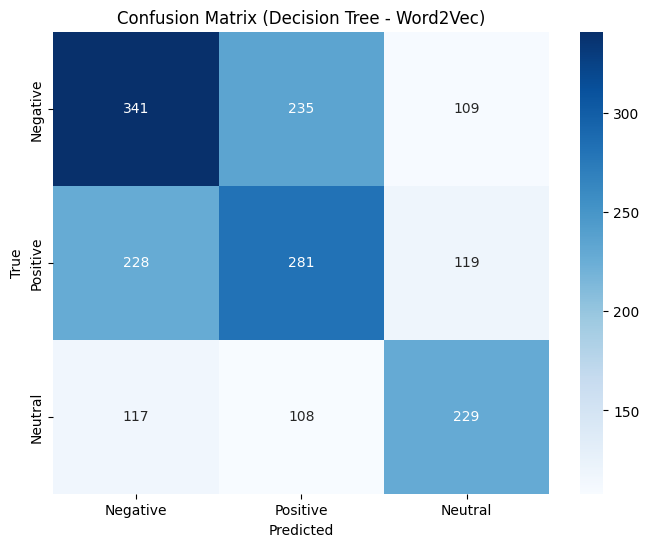

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
import string

# Ensure nltk tokenization resources are available
nltk.download('punkt')

# Load the data file
file_path = "/content/drive/MyDrive/AIML files/Reddit Califonia/vader_sentiment_analysis.csv"  # Adjust path as needed
df = pd.read_csv(file_path)

# Select only the desired columns
df = df[['body', 'compound', 'positive', 'neutral', 'negative']]

# Remove rows with null values in any of the selected columns
df = df.dropna()

# Function to categorize compound sentiment scores
def categorize_compound(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to create the new column
df['Compound category'] = df['compound'].apply(categorize_compound)

# Tokenize the text data for Word2Vec
def preprocess_text(text):
    text = text.lower().translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    try:
        return word_tokenize(text)  # Try using NLTK tokenizer
    except LookupError:
        return text.split()  # Fallback: simple split by space

df['tokenized_body'] = df['body'].apply(preprocess_text)

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=df['tokenized_body'], vector_size=100, window=5, min_count=2, workers=4)

# Function to get sentence vectors (average of word vectors)
def get_sentence_vector(words, model, vector_size=100):
    vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size)

# Convert text to numerical vectors
X = np.array([get_sentence_vector(words, word2vec_model) for words in df['tokenized_body']])

# Encode the target variable
y = df['Compound category'].map({'Positive': 1, 'Negative': 0, 'Neutral': 2})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Create the confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive', 'Neutral'],
            yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Decision Tree - Word2Vec)")
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Accuracy: 0.5398981324278438

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.63      0.58       685
           1       0.49      0.47      0.48       628
           2       0.64      0.49      0.55       454

    accuracy                           0.54      1767
   macro avg       0.55      0.53      0.54      1767
weighted avg       0.55      0.54      0.54      1767



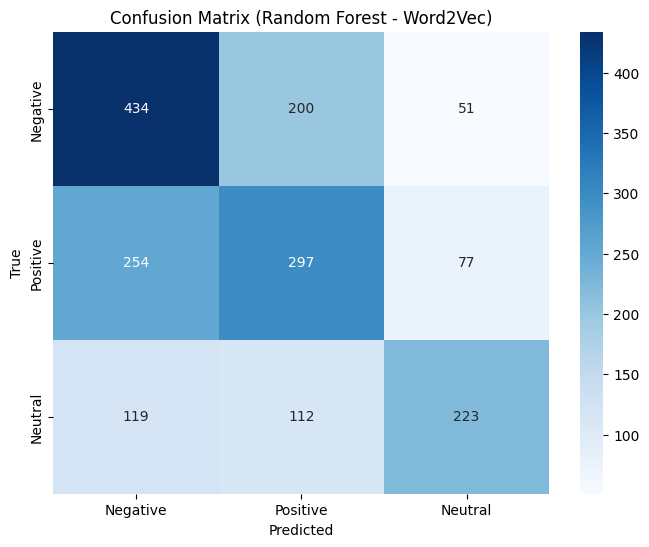

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
import string
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Ensure nltk tokenization resources are available
nltk.download('punkt')

# Load the data file
file_path = "/content/drive/MyDrive/AIML files/Reddit Califonia/vader_sentiment_analysis.csv"  # Adjust path as needed
df = pd.read_csv(file_path)

# Select only the desired columns
df = df[['body', 'compound', 'positive', 'neutral', 'negative']]

# Remove rows with null values in any of the selected columns
df = df.dropna()

# Function to categorize compound sentiment scores
def categorize_compound(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to create the new column
df['Compound category'] = df['compound'].apply(categorize_compound)

# Tokenize the text data for Word2Vec
def preprocess_text(text):
    text = text.lower().translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    try:
        return word_tokenize(text)  # Try using NLTK tokenizer
    except LookupError:
        return text.split()  # Fallback: simple split by space

df['tokenized_body'] = df['body'].apply(preprocess_text)

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=df['tokenized_body'], vector_size=100, window=5, min_count=2, workers=4)

# Function to get sentence vectors (average of word vectors)
def get_sentence_vector(words, model, vector_size=100):
    vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size)

# Convert text to numerical vectors
X = np.array([get_sentence_vector(words, word2vec_model) for words in df['tokenized_body']])

# Encode the target variable
y = df['Compound category'].map({'Positive': 1, 'Negative': 0, 'Neutral': 2})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Create the confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive', 'Neutral'],
            yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Random Forest - Word2Vec)")
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


--2025-03-03 05:15:01--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-03-03 05:15:01--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-03-03 05:15:01--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

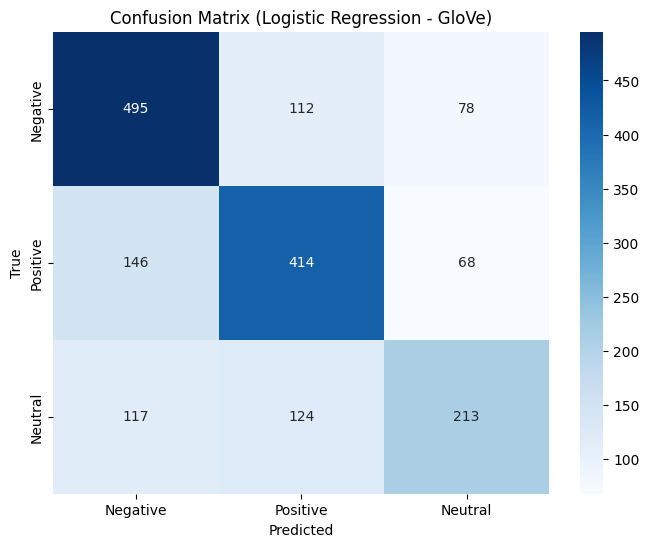

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import nltk
from nltk.tokenize import word_tokenize
import string

# Ensure nltk tokenization resources are available
nltk.download('punkt')

# Load the data file
file_path = "/content/drive/MyDrive/AIML files/Reddit Califonia/vader_sentiment_analysis.csv"  # Adjust path as needed
df = pd.read_csv(file_path)

# Select only the desired columns
df = df[['body', 'compound', 'positive', 'neutral', 'negative']]

# Remove rows with null values in any of the selected columns
df = df.dropna()

# Function to categorize compound sentiment scores
def categorize_compound(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to create the new column
df['Compound category'] = df['compound'].apply(categorize_compound)

# Tokenize the text data for Word2Vec
def preprocess_text(text):
    text = text.lower().translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    try:
        return word_tokenize(text)  # Try using NLTK tokenizer
    except LookupError:
        return text.split()  # Fallback: simple split by space

df['tokenized_body'] = df['body'].apply(preprocess_text)

# Download and load GloVe embeddings (50D, 100D, or 300D)
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

# Load the GloVe model
def load_glove_model(glove_file_path):
    embeddings = {}
    with open(glove_file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

# Load the 100D GloVe embeddings
glove_path = "glove.6B.100d.txt"  # Change to 50d or 300d if needed
glove_embeddings = load_glove_model(glove_path)

# Function to get sentence vector by averaging word vectors
def get_sentence_vector(words, embeddings, vector_size=100):
    vectors = [embeddings[word] for word in words if word in embeddings]
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size)

# Convert text to numerical vectors using GloVe
X = np.array([get_sentence_vector(words, glove_embeddings) for words in df['tokenized_body']])

# Encode the target variable
y = df['Compound category'].map({'Positive': 1, 'Negative': 0, 'Neutral': 2})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train Logistic Regression model
logistic_model = LogisticRegression(max_iter=500, class_weight='balanced', solver='liblinear')
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_glove = logistic_model.predict(X_test)

# Evaluate the Logistic Regression model
print("Accuracy:", accuracy_score(y_test, y_pred_glove))
print("\nClassification Report:\n", classification_report(y_test, y_pred_glove))

# Create the confusion matrix for Logistic Regression
cm_glove = confusion_matrix(y_test, y_pred_glove)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_glove, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive', 'Neutral'],
            yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Logistic Regression - GloVe)")
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


--2025-03-07 08:18:24--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-03-07 08:18:24--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-03-07 08:18:24--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

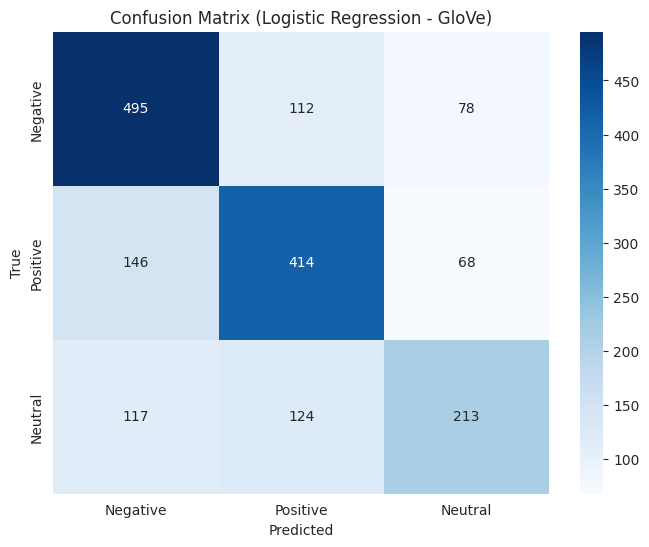

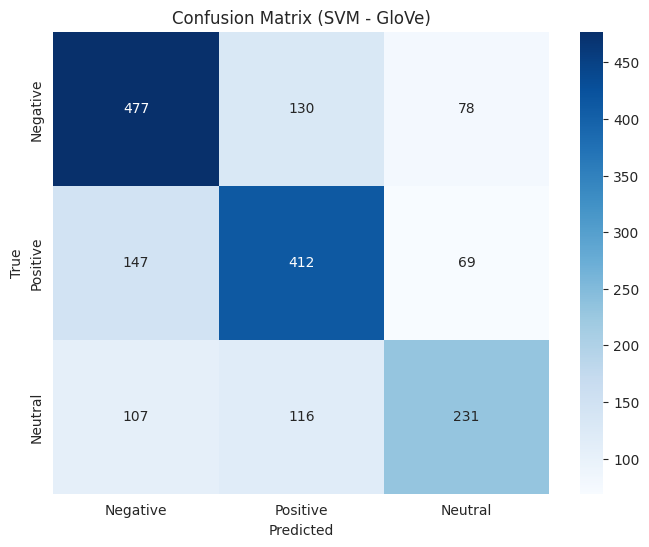

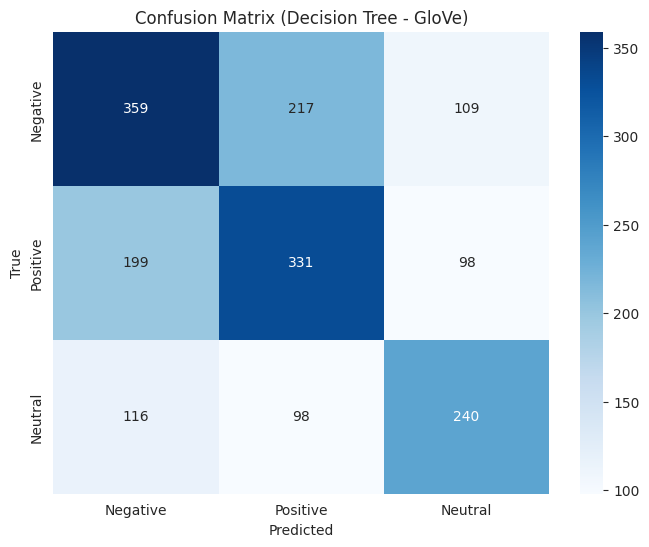

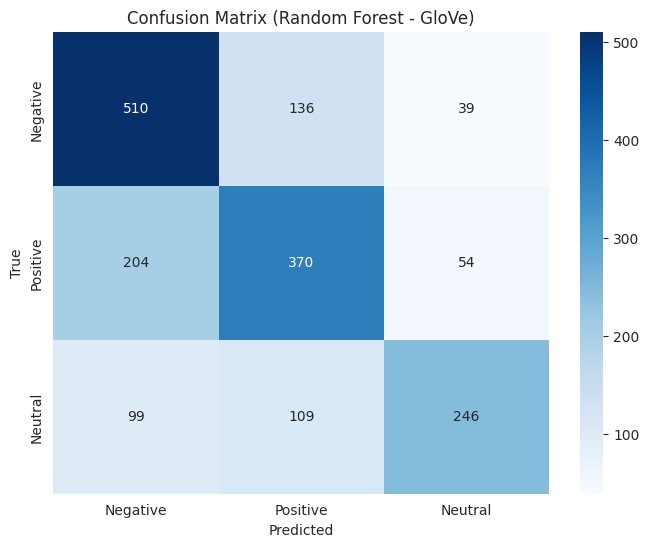

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import nltk
from nltk.tokenize import word_tokenize
import string

# Ensure nltk tokenization resources are available
nltk.download('punkt')

# Load the data file
file_path = "/content/drive/MyDrive/AIML files/Reddit Califonia/vader_sentiment_analysis.csv"  # Adjust path as needed
df = pd.read_csv(file_path)

# Select only the desired columns
df = df[['body', 'compound', 'positive', 'neutral', 'negative']]

# Remove rows with null values in any of the selected columns
df = df.dropna()

# Function to categorize compound sentiment scores
def categorize_compound(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to create the new column
df['Compound category'] = df['compound'].apply(categorize_compound)

# Tokenize the text data for GloVe
def preprocess_text(text):
    text = text.lower().translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    try:
        return word_tokenize(text)  # Try using NLTK tokenizer
    except LookupError:
        return text.split()  # Fallback: simple split by space

df['tokenized_body'] = df['body'].apply(preprocess_text)

# Download and load GloVe embeddings (100D)
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

# Load the GloVe model
def load_glove_model(glove_file_path):
    embeddings = {}
    with open(glove_file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

# Load the 100D GloVe embeddings
glove_path = "glove.6B.100d.txt"  # Change to 50d or 300d if needed
glove_embeddings = load_glove_model(glove_path)

# Function to get sentence vector by averaging word vectors
def get_sentence_vector(words, embeddings, vector_size=100):
    vectors = [embeddings[word] for word in words if word in embeddings]
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size)

# Convert text to numerical vectors using GloVe
X = np.array([get_sentence_vector(words, glove_embeddings) for words in df['tokenized_body']])

# Encode the target variable
y = df['Compound category'].map({'Positive': 1, 'Negative': 0, 'Neutral': 2})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, class_weight='balanced', solver='liblinear'),
    "SVM": SVC(kernel='linear', class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
}

# Train and evaluate models
results = []
confusion_matrices = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")

    # Generate classification report
    report = classification_report(y_test, y_pred)
    print(f"\nClassification Report for {model_name}:\n{report}")

    # Store results
    results.append({"Model": model_name, "Accuracy": accuracy})

    # Store confusion matrix
    confusion_matrices[model_name] = confusion_matrix(y_test, y_pred)

# Convert results to DataFrame and display
df_results = pd.DataFrame(results)
print("\nModel Performance Comparison:\n", df_results)

# Plot confusion matrices
for model_name, cm in confusion_matrices.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Negative', 'Positive', 'Neutral'],
                yticklabels=['Negative', 'Positive', 'Neutral'])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix ({model_name} - GloVe)")
    plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



### Model Performance Comparison Across Tokenization Techniques ###
   Tokenization                Model  Accuracy  Precision (Macro Avg)  \
0        TF-IDF  Logistic Regression  0.720996               0.716961   
1        TF-IDF                  SVM  0.707980               0.702674   
2        TF-IDF        Decision Tree  0.672326               0.671237   
3        TF-IDF        Random Forest  0.715337               0.715852   
4      Word2Vec  Logistic Regression  0.490662               0.497400   
5      Word2Vec                  SVM  0.481607               0.526422   
6      Word2Vec        Decision Tree  0.441426               0.440777   
7      Word2Vec        Random Forest  0.536503               0.557472   
8         GloVe  Logistic Regression  0.634975               0.627757   
9         GloVe                  SVM  0.633843               0.629927   
10        GloVe        Decision Tree  0.526316               0.527313   
11        GloVe        Random Forest  0.637238         

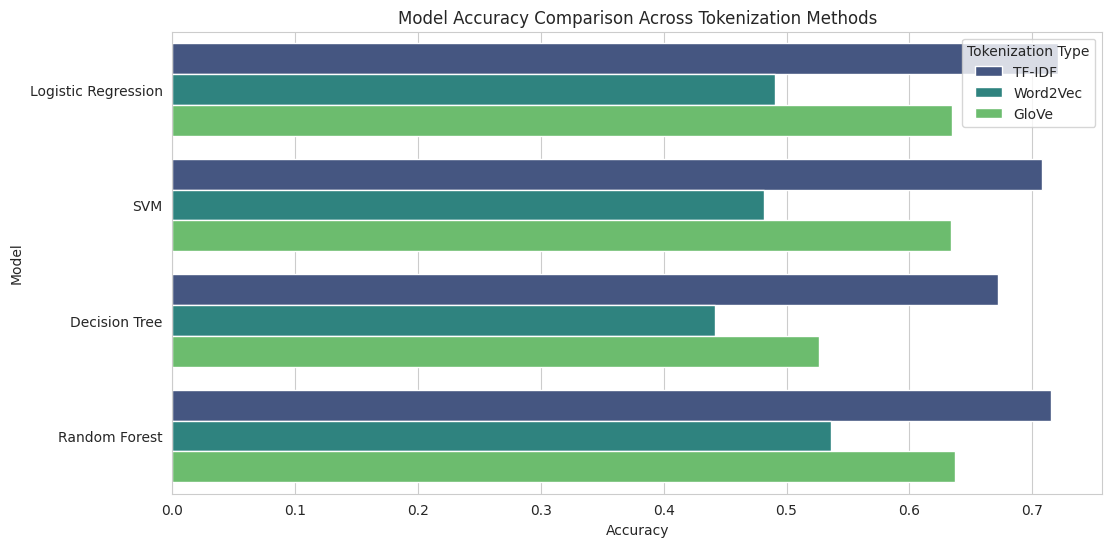

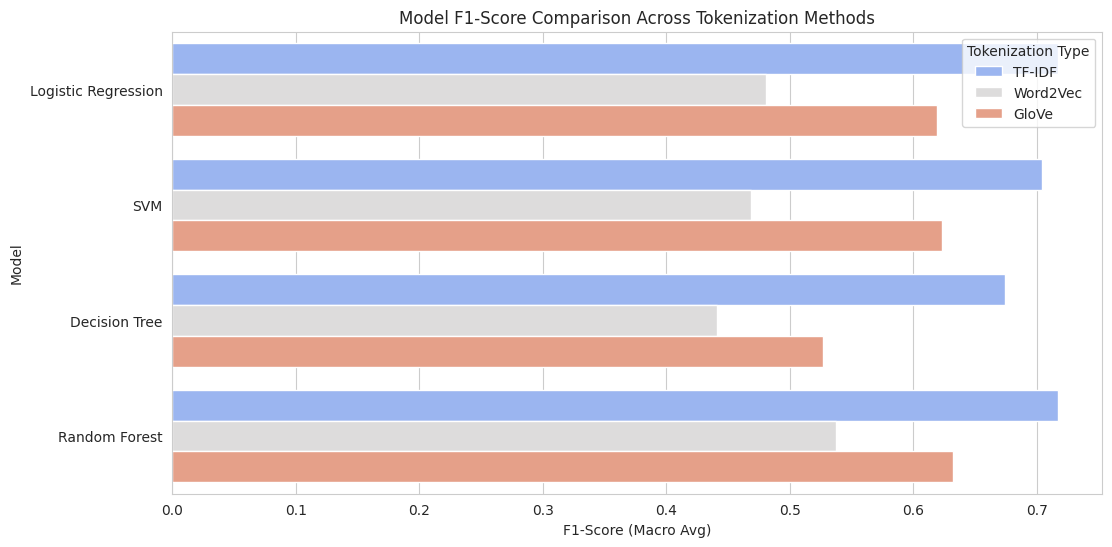

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Load the data file
file_path = "/content/drive/MyDrive/AIML files/Reddit Califonia/vader_sentiment_analysis.csv"  # Adjust path as needed
df = pd.read_csv(file_path)

# Select only the desired columns
df = df[['body', 'compound', 'positive', 'neutral', 'negative']]

# Remove rows with null values in any of the selected columns
df = df.dropna()

# Store model performance results
model_performance = []

# Function to evaluate models and store results
def evaluate_model(tokenization_type, model_name, y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)  # Get report as dictionary
    accuracy = accuracy_score(y_true, y_pred)

    # Store results
    model_performance.append({
        "Tokenization": tokenization_type,
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision (Macro Avg)": report["macro avg"]["precision"],
        "Recall (Macro Avg)": report["macro avg"]["recall"],
        "F1-Score (Macro Avg)": report["macro avg"]["f1-score"],
        "Precision (Weighted Avg)": report["weighted avg"]["precision"],
        "Recall (Weighted Avg)": report["weighted avg"]["recall"],
        "F1-Score (Weighted Avg)": report["weighted avg"]["f1-score"]
    })

# --- TRAIN MODELS FOR EACH TOKENIZATION METHOD ---

# **TF-IDF**
from sklearn.feature_extraction.text import TfidfVectorizer

# Function to categorize compound sentiment scores
def categorize_compound(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to create the new column
df['Compound category'] = df['compound'].apply(categorize_compound)

vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_features=500000)
X_tfidf = vectorizer_tfidf.fit_transform(df['body'])  # Convert text to numerical features
y = df['Compound category'].map({'Positive': 1, 'Negative': 0, 'Neutral': 2})

X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

tfidf_models = {
    "Logistic Regression": LogisticRegression(max_iter=500, class_weight='balanced', solver='liblinear'),
    "SVM": SVC(kernel='linear', class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
}

for model_name, model in tfidf_models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    evaluate_model("TF-IDF", model_name, y_test, y_pred)

# **Word2Vec**
import gensim
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')

# Apply the function to create the new column
df['Compound category'] = df['compound'].apply(categorize_compound)

# Tokenize the text data for Word2Vec
def preprocess_text(text):
    text = text.lower().translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    try:
        return word_tokenize(text)  # Try using NLTK tokenizer
    except LookupError:
        return text.split()  # Fallback: simple split by space

df['tokenized_body'] = df['body'].apply(preprocess_text)

# Train Word2Vec
word2vec_model = Word2Vec(sentences=df['tokenized_body'], vector_size=100, window=5, min_count=2, workers=4)

# Convert sentences to numerical vectors
def get_sentence_vector(words, model, vector_size=100):
    vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size)

X_word2vec = np.array([get_sentence_vector(words, word2vec_model) for words in df['tokenized_body']])

X_train_w2v, X_test_w2v, y_train, y_test = train_test_split(X_word2vec, y, test_size=0.2, random_state=42, stratify=y)

word2vec_models = {
    "Logistic Regression": LogisticRegression(max_iter=500, class_weight='balanced', solver='liblinear'),
    "SVM": SVC(kernel='linear', class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
}

for model_name, model in word2vec_models.items():
    model.fit(X_train_w2v, y_train)
    y_pred = model.predict(X_test_w2v)
    evaluate_model("Word2Vec", model_name, y_test, y_pred)

# **GloVe**


# Load GloVe model
def load_glove_model(glove_file_path):
    embeddings = {}
    with open(glove_file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

# Load the GloVe embeddings
glove_path = "glove.6B.100d.txt"  # Change to 50d or 300d if needed
glove_embeddings = load_glove_model(glove_path)

# Updated function for both Word2Vec and GloVe
def get_sentence_vector(words, embeddings, vector_size=100, is_glove=False):
    if is_glove:
        vectors = [embeddings[word] for word in words if word in embeddings]
    else:
        vectors = [embeddings.wv[word] for word in words if word in embeddings.wv]

    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size)

# Convert text to numerical vectors using GloVe
X_glove = np.array([get_sentence_vector(words, glove_embeddings, is_glove=True) for words in df['tokenized_body']])

# Train-test split
X_train_glove, X_test_glove, y_train, y_test = train_test_split(X_glove, y, test_size=0.2, random_state=42, stratify=y)

# Train and evaluate models
glove_models = {
    "Logistic Regression": LogisticRegression(max_iter=500, class_weight='balanced', solver='liblinear'),
    "SVM": SVC(kernel='linear', class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
}

for model_name, model in glove_models.items():
    model.fit(X_train_glove, y_train)
    y_pred = model.predict(X_test_glove)
    evaluate_model("GloVe", model_name, y_test, y_pred)

# Convert results to DataFrame
df_comparison = pd.DataFrame(model_performance)

# Print model comparison table
print("\n### Model Performance Comparison Across Tokenization Techniques ###")
print(df_comparison)

# Set plot style
sns.set_style("whitegrid")

# Plot accuracy comparison across tokenization methods
plt.figure(figsize=(12, 6))
sns.barplot(x="Accuracy", y="Model", hue="Tokenization", data=df_comparison, palette="viridis")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.title("Model Accuracy Comparison Across Tokenization Methods")
plt.legend(title="Tokenization Type")
plt.show()

# Plot F1-score comparison across tokenization methods
plt.figure(figsize=(12, 6))
sns.barplot(x="F1-Score (Macro Avg)", y="Model", hue="Tokenization", data=df_comparison, palette="coolwarm")
plt.xlabel("F1-Score (Macro Avg)")
plt.ylabel("Model")
plt.title("Model F1-Score Comparison Across Tokenization Methods")
plt.legend(title="Tokenization Type")
plt.show()

In [ ]:
# prompt: export df_comparison to csv

df_comparison.to_csv('df_comparison.csv', index=False)


In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset, random_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tqdm import tqdm

Using device: cuda


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 3/3: 100%|██████████| 884/884 [02:32<00:00,  5.81it/s, loss=0.0196]



BERT Sentiment Classification Accuracy: 0.8308

Classification Report:
               precision    recall  f1-score   support

    Negative       0.77      0.92      0.84       657
    Positive       0.89      0.73      0.80       643
     Neutral       0.88      0.84      0.86       467

    accuracy                           0.83      1767
   macro avg       0.84      0.83      0.83      1767
weighted avg       0.84      0.83      0.83      1767



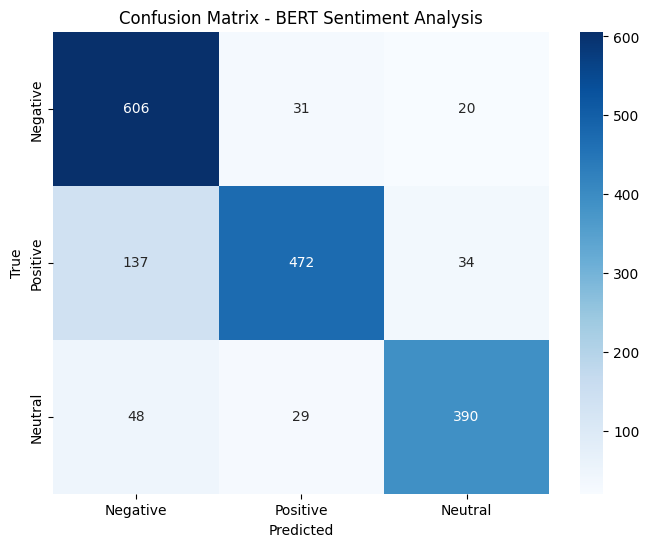

In [ ]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load dataset
file_path = "/content/drive/MyDrive/AIML files/Reddit Califonia/vader_sentiment_analysis.csv"  # Adjust path
df = pd.read_csv(file_path)

# Select required columns
df = df[['body', 'compound']].dropna()

# Function to categorize sentiment
def categorize_compound(compound):
    if compound >= 0.05:
        return 1  # Positive
    elif compound <= -0.05:
        return 0  # Negative
    else:
        return 2  # Neutral

df['label'] = df['compound'].apply(categorize_compound)

# Load BERT Tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenization function
def tokenize_text(text):
    return tokenizer(text, padding="max_length", truncation=True, max_length=512, return_tensors="pt")

# Custom Dataset class for PyTorch
class SentimentDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = tokenize_text(text)

        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "label": torch.tensor(label, dtype=torch.long),
        }

# Create dataset
dataset = SentimentDataset(df['body'].tolist(), df['label'].tolist())

# Split dataset into training & testing sets (80-20 split)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Load Pre-trained BERT model for classification
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)
model.to(device)

# Define Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=2e-5)

# Training Loop
num_epochs = 3  # You can increase for better performance
for epoch in range(num_epochs):
    model.train()
    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")

    for batch in loop:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask)
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()

        loop.set_postfix(loss=loss.item())

# Evaluation
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f"\nBERT Sentiment Classification Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:\n", classification_report(all_labels, all_preds, target_names=["Negative", "Positive", "Neutral"]))

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive", "Neutral"], yticklabels=["Negative", "Positive", "Neutral"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - BERT Sentiment Analysis")
plt.show()

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset, random_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import word_tokenize
import string
from gensim.models import Word2Vec

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load dataset
file_path = "/content/drive/MyDrive/AIML files/Reddit Califonia/vader_sentiment_analysis.csv"  # Adjust path
df = pd.read_csv(file_path)

# Select required columns
df = df[['body', 'compound']].dropna()

# Function to categorize sentiment
def categorize_compound(compound):
    if compound >= 0.05:
        return 1  # Positive
    elif compound <= -0.05:
        return 0  # Negative
    else:
        return 2  # Neutral

df['label'] = df['compound'].apply(categorize_compound)

# Store model performance results
model_performance = []

# Function to evaluate models and store results
def evaluate_model(tokenization_type, model_name, y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    accuracy = accuracy_score(y_true, y_pred)

    model_performance.append({
        "Tokenization": tokenization_type,
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision (Macro Avg)": report["macro avg"]["precision"],
        "Recall (Macro Avg)": report["macro avg"]["recall"],
        "F1-Score (Macro Avg)": report["macro avg"]["f1-score"],
        "Precision (Weighted Avg)": report["weighted avg"]["precision"],
        "Recall (Weighted Avg)": report["weighted avg"]["recall"],
        "F1-Score (Weighted Avg)": report["weighted avg"]["f1-score"]
    })

# --- TRAIN MODELS FOR EACH TOKENIZATION METHOD ---

# **1️⃣ TF-IDF Tokenization**
vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_features=500000)
X_tfidf = vectorizer_tfidf.fit_transform(df['body'])
y = df['label']

X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

tfidf_models = {
    "Logistic Regression": LogisticRegression(max_iter=500, class_weight='balanced', solver='liblinear'),
    "SVM": SVC(kernel='linear', class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
}

for model_name, model in tfidf_models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    evaluate_model("TF-IDF", model_name, y_test, y_pred)

# **2️⃣ Word2Vec Tokenization (UPDATED)**
nltk.download('punkt')

# Tokenize the text data for Word2Vec (Updated function)
def preprocess_text(text):
    text = text.lower().translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    try:
        return word_tokenize(text)  # Try using NLTK tokenizer
    except LookupError:
        return text.split()  # Fallback: simple split by space

df['tokenized_body'] = df['body'].apply(preprocess_text)

# Train Word2Vec
word2vec_model = Word2Vec(sentences=df['tokenized_body'], vector_size=100, window=5, min_count=2, workers=4)

# Convert sentences to numerical vectors
def get_sentence_vector(words, model, vector_size=100):
    vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size)

X_word2vec = np.array([get_sentence_vector(words, word2vec_model) for words in df['tokenized_body']])

X_train_w2v, X_test_w2v, y_train, y_test = train_test_split(X_word2vec, y, test_size=0.2, random_state=42, stratify=y)

word2vec_models = {
    "Logistic Regression": LogisticRegression(max_iter=500, class_weight='balanced', solver='liblinear'),
    "SVM": SVC(kernel='linear', class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
}

for model_name, model in word2vec_models.items():
    model.fit(X_train_w2v, y_train)
    y_pred = model.predict(X_test_w2v)
    evaluate_model("Word2Vec", model_name, y_test, y_pred)

# **3️⃣ BERT Tokenization & Training**
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

class SentimentDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = tokenizer(text, padding="max_length", truncation=True, max_length=512, return_tensors="pt")

        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "label": torch.tensor(label, dtype=torch.long),
        }

dataset = SentimentDataset(df['body'].tolist(), df['label'].tolist())

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=2e-5)

num_epochs = 3
for epoch in range(num_epochs):
    model.train()
    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")

    for batch in loop:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask)
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()

        loop.set_postfix(loss=loss.item())

# Evaluate BERT
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

evaluate_model("BERT", "BERT-Base", all_labels, all_preds)

# Print final results
df_comparison = pd.DataFrame(model_performance)
print(df_comparison)

Using device: cuda


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 3/3: 100%|██████████| 884/884 [02:31<00:00,  5.83it/s, loss=0.00648]


  Tokenization                Model  Accuracy  Precision (Macro Avg)  \
0       TF-IDF  Logistic Regression  0.720996               0.716961   
1       TF-IDF                  SVM  0.707980               0.702674   
2       TF-IDF        Decision Tree  0.672326               0.671237   
3       TF-IDF        Random Forest  0.715337               0.715852   
4     Word2Vec  Logistic Regression  0.490096               0.496259   
5     Word2Vec                  SVM  0.483305               0.527441   
6     Word2Vec        Decision Tree  0.481041               0.481193   
7     Word2Vec        Random Forest  0.528580               0.540871   
8         BERT            BERT-Base  0.830221               0.836038   

   Recall (Macro Avg)  F1-Score (Macro Avg)  Precision (Weighted Avg)  \
0            0.717651              0.717222                  0.721657   
1            0.706176              0.703938                  0.710235   
2            0.680490              0.674317                 


### Model Performance Comparison Across Tokenization Techniques ###
   Tokenization                Model  Accuracy  Precision (Macro Avg)  \
0        TF-IDF  Logistic Regression  0.720996               0.716961   
1        TF-IDF                  SVM  0.707980               0.702674   
2        TF-IDF        Decision Tree  0.672326               0.671237   
3        TF-IDF        Random Forest  0.715337               0.715852   
4      Word2Vec  Logistic Regression  0.496321               0.504748   
5      Word2Vec                  SVM  0.494058               0.544173   
6      Word2Vec        Decision Tree  0.481607               0.482317   
7      Word2Vec        Random Forest  0.532541               0.544122   
8         GloVe  Logistic Regression  0.634975               0.627757   
9         GloVe                  SVM  0.633843               0.629927   
10        GloVe        Decision Tree  0.526316               0.527313   
11        GloVe        Random Forest  0.637238         

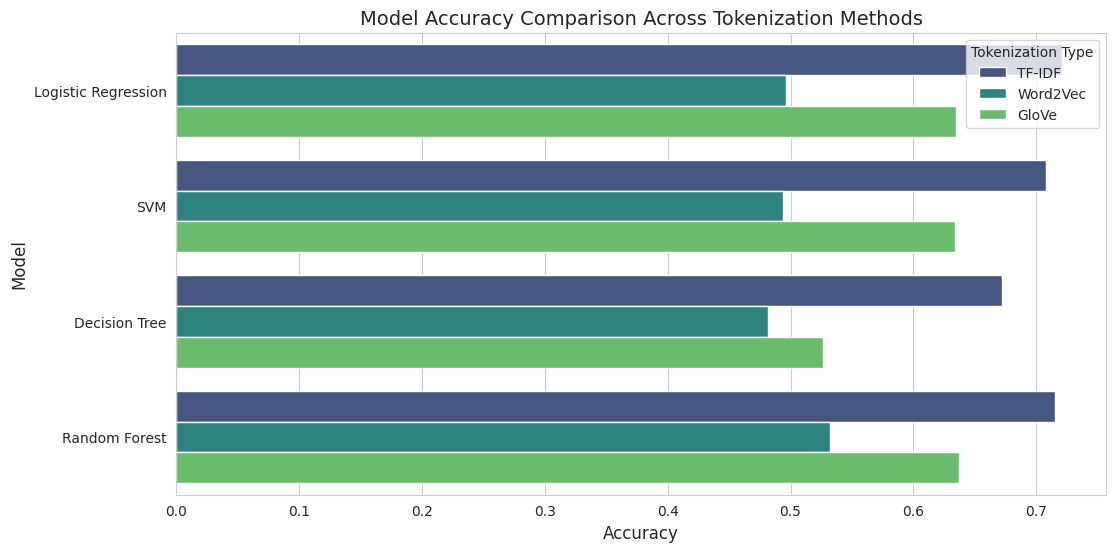

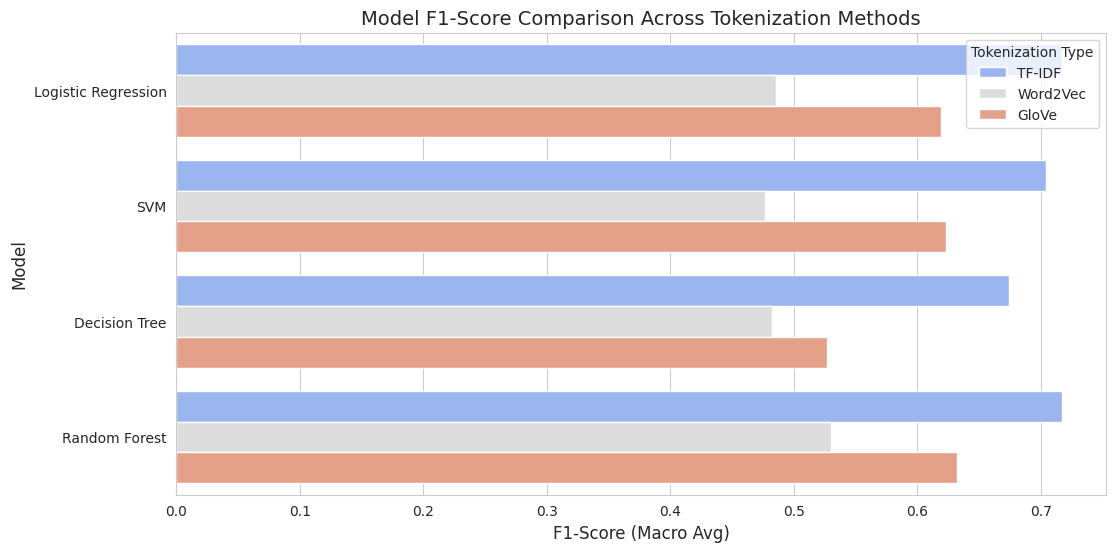

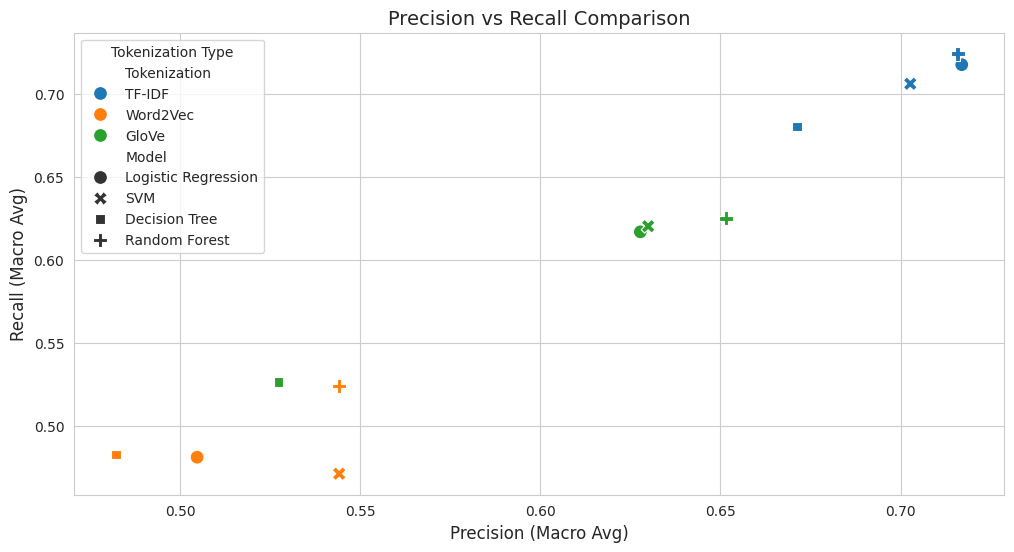

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the stored model performance results (Ensure df_comparison is available)
df_comparison = pd.DataFrame(model_performance)  # Ensure model_performance is populated

# Print Model Performance Table
print("\n### Model Performance Comparison Across Tokenization Techniques ###")
print(df_comparison)

# Set plot style
sns.set_style("whitegrid")

# **Plot Accuracy Comparison**
plt.figure(figsize=(12, 6))
sns.barplot(x="Accuracy", y="Model", hue="Tokenization", data=df_comparison, palette="viridis")
plt.xlabel("Accuracy", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.title("Model Accuracy Comparison Across Tokenization Methods", fontsize=14)
plt.legend(title="Tokenization Type", fontsize=10)
plt.show()

# **Plot F1-Score (Macro Avg) Comparison**
plt.figure(figsize=(12, 6))
sns.barplot(x="F1-Score (Macro Avg)", y="Model", hue="Tokenization", data=df_comparison, palette="coolwarm")
plt.xlabel("F1-Score (Macro Avg)", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.title("Model F1-Score Comparison Across Tokenization Methods", fontsize=14)
plt.legend(title="Tokenization Type", fontsize=10)
plt.show()

# **Plot Precision vs Recall (Macro Avg)**
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Precision (Macro Avg)", y="Recall (Macro Avg)", hue="Tokenization", style="Model", data=df_comparison, s=100)
plt.xlabel("Precision (Macro Avg)", fontsize=12)
plt.ylabel("Recall (Macro Avg)", fontsize=12)
plt.title("Precision vs Recall Comparison", fontsize=14)
plt.legend(title="Tokenization Type", fontsize=10)
plt.show()

In [ ]:
# prompt: export df_comparison to csv

df_comparison.to_csv('df_comparison.csv', index=False)

Using device: cuda


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 3/3: 100%|██████████| 884/884 [02:31<00:00,  5.82it/s, loss=1.42]



### Model Performance Comparison ###
                 Model  Accuracy  Precision (Macro Avg)  Recall (Macro Avg)  \
0  Logistic Regression  0.654216               0.653094            0.660305   
1                  SVM  0.640634               0.639071            0.645620   
2        Decision Tree  0.528580               0.530299            0.525997   
3        Random Forest  0.612903               0.627778            0.602323   
4      Fine-tuned BERT  0.856254               0.863312            0.852938   

   F1-Score (Macro Avg)  Precision (Weighted Avg)  Recall (Weighted Avg)  \
0              0.655824                  0.654093               0.654216   
1              0.641531                  0.640403               0.640634   
2              0.527786                  0.529273               0.528580   
3              0.608809                  0.619473               0.612903   
4              0.857327                  0.857846               0.856254   

   F1-Score (Weighted Avg)  
0

<ipython-input-29-7bb50df201c5>:179: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=df_comparison_bert, palette="viridis")


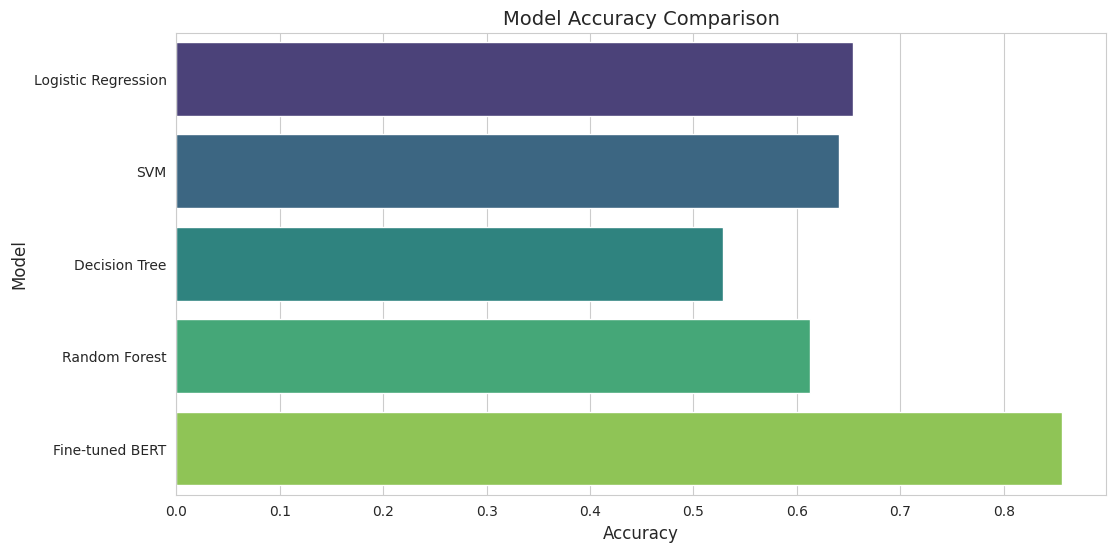

<ipython-input-29-7bb50df201c5>:187: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="F1-Score (Macro Avg)", y="Model", data=df_comparison_bert, palette="coolwarm")


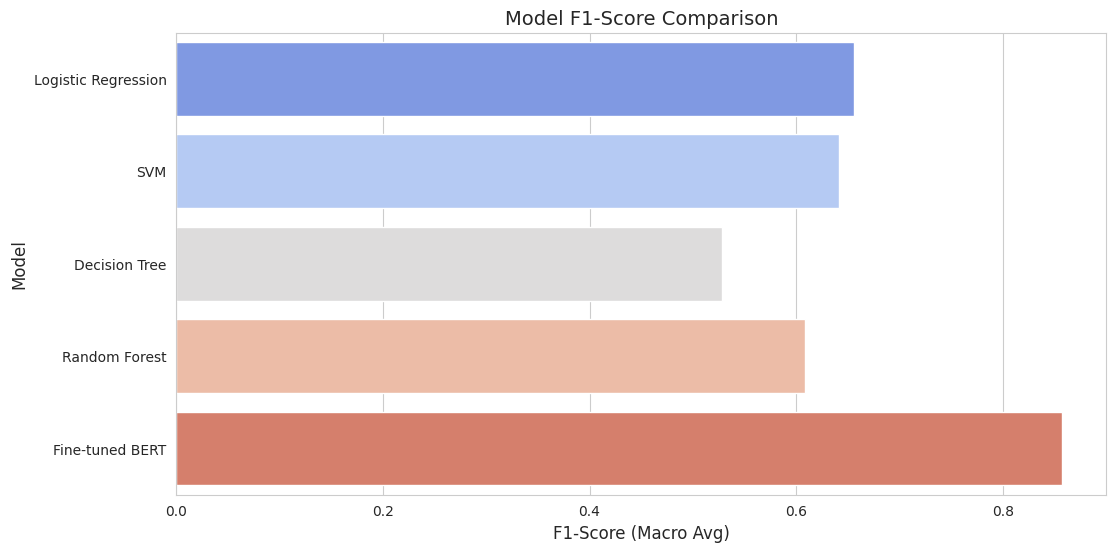

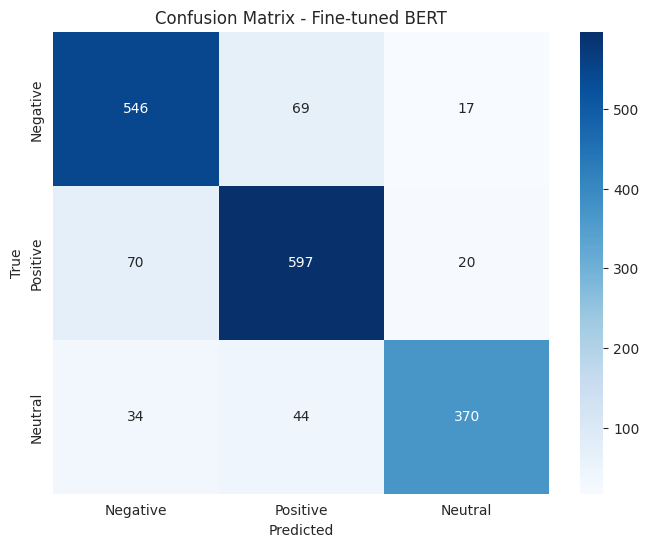

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from transformers import BertTokenizer, BertModel, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset, random_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load dataset
file_path = "/content/drive/MyDrive/AIML files/Reddit Califonia/vader_sentiment_analysis.csv"  # Adjust path
df = pd.read_csv(file_path)

# Select required columns
df = df[['body', 'compound']].dropna()

# Function to categorize sentiment
def categorize_compound(compound):
    if compound >= 0.05:
        return 1  # Positive
    elif compound <= -0.05:
        return 0  # Negative
    else:
        return 2  # Neutral

df['label'] = df['compound'].apply(categorize_compound)

# Load BERT Tokenizer & Model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = BertModel.from_pretrained("bert-base-uncased").to(device)

# Tokenization function
def tokenize_text(text):
    encoding = tokenizer(text, padding="max_length", truncation=True, max_length=512, return_tensors="pt")
    return encoding

# Extract BERT embeddings
def get_bert_embedding(text):
    encoding = tokenize_text(text)
    input_ids = encoding["input_ids"].to(device)
    attention_mask = encoding["attention_mask"].to(device)

    with torch.no_grad():
        output = bert_model(input_ids, attention_mask=attention_mask)

    return output.last_hidden_state[:, 0, :].cpu().numpy().flatten()

# Generate embeddings for all texts
X_bert = np.array([get_bert_embedding(text) for text in df['body']])
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_bert, y, test_size=0.2, random_state=42, stratify=y)

# Store model performance results
model_performance = []

# Function to evaluate models
def evaluate_model(model_name, y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    accuracy = accuracy_score(y_true, y_pred)

    model_performance.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision (Macro Avg)": report["macro avg"]["precision"],
        "Recall (Macro Avg)": report["macro avg"]["recall"],
        "F1-Score (Macro Avg)": report["macro avg"]["f1-score"],
        "Precision (Weighted Avg)": report["weighted avg"]["precision"],
        "Recall (Weighted Avg)": report["weighted avg"]["recall"],
        "F1-Score (Weighted Avg)": report["weighted avg"]["f1-score"]
    })

# --- Train Traditional ML Models ---
ml_bert_models = {
    "Logistic Regression": LogisticRegression(max_iter=500, class_weight='balanced', solver='liblinear'),
    "SVM": SVC(kernel='linear', class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
}

for model_name, model in ml_bert_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    evaluate_model(model_name, y_test, y_pred)

# --- Train Deep Learning Model (Fine-tuned BERT) ---
class SentimentDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = tokenize_text(text)

        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "label": torch.tensor(label, dtype=torch.long),
        }

dataset = SentimentDataset(df['body'].tolist(), df['label'].tolist())

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

bert_classifier = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(bert_classifier.parameters(), lr=2e-5)

num_epochs = 3
for epoch in range(num_epochs):
    bert_classifier.train()
    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")

    for batch in loop:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        optimizer.zero_grad()
        outputs = bert_classifier(input_ids, attention_mask=attention_mask)
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()

        loop.set_postfix(loss=loss.item())

# Evaluate Fine-tuned BERT
bert_classifier.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        outputs = bert_classifier(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

evaluate_model("Fine-tuned BERT", all_labels, all_preds)

# Convert results to DataFrame
df_comparison_bert = pd.DataFrame(model_performance)

# Print model comparison table
print("\n### Model Performance Comparison ###")
print(df_comparison_bert)

# **Plot Accuracy Comparison**
plt.figure(figsize=(12, 6))
sns.barplot(x="Accuracy", y="Model", data=df_comparison_bert, palette="viridis")
plt.xlabel("Accuracy", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.title("Model Accuracy Comparison", fontsize=14)
plt.show()

# **Plot F1-Score (Macro Avg) Comparison**
plt.figure(figsize=(12, 6))
sns.barplot(x="F1-Score (Macro Avg)", y="Model", data=df_comparison_bert, palette="coolwarm")
plt.xlabel("F1-Score (Macro Avg)", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.title("Model F1-Score Comparison", fontsize=14)
plt.show()

# **Plot Confusion Matrix for Fine-tuned BERT**
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive", "Neutral"], yticklabels=["Negative", "Positive", "Neutral"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Fine-tuned BERT")
plt.show()


### Model Performance Comparison ###
   Tokenization                Model  Accuracy  Precision (Macro Avg)  \
0        TF-IDF  Logistic Regression  0.720996               0.716961   
1        TF-IDF                  SVM  0.707980               0.702674   
2        TF-IDF        Decision Tree  0.672326               0.671237   
3        TF-IDF        Random Forest  0.715337               0.715852   
4      Word2Vec  Logistic Regression  0.496321               0.504748   
5      Word2Vec                  SVM  0.494058               0.544173   
6      Word2Vec        Decision Tree  0.481607               0.482317   
7      Word2Vec        Random Forest  0.532541               0.544122   
8         GloVe  Logistic Regression  0.634975               0.627757   
9         GloVe                  SVM  0.633843               0.629927   
10        GloVe        Decision Tree  0.526316               0.527313   
11        GloVe        Random Forest  0.637238               0.651532   

    Recall (

<ipython-input-15-62daac35d484>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=df_comparison1, palette="viridis")


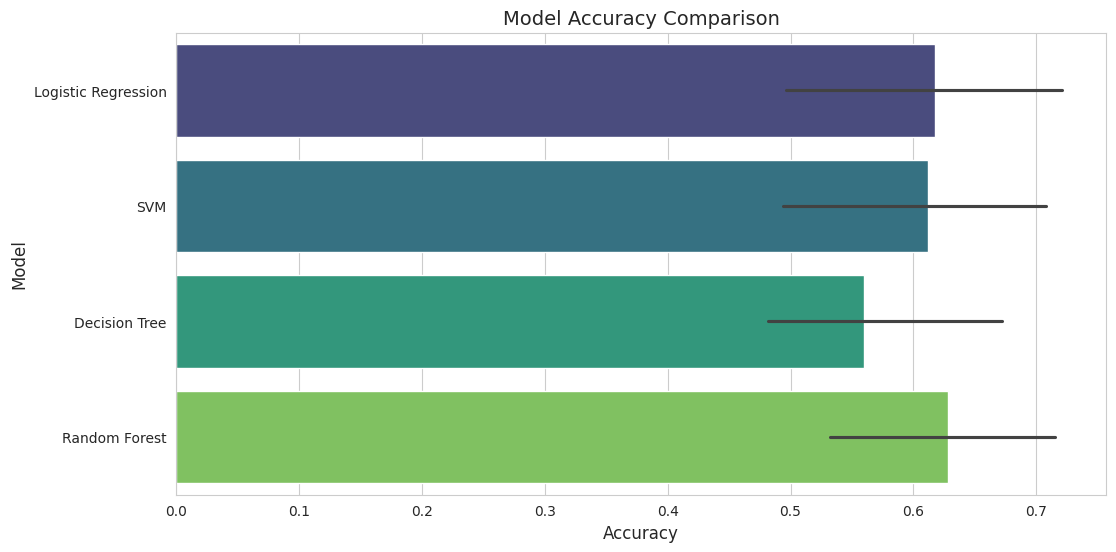

<ipython-input-15-62daac35d484>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="F1-Score (Macro Avg)", y="Model", data=df_comparison1, palette="coolwarm")


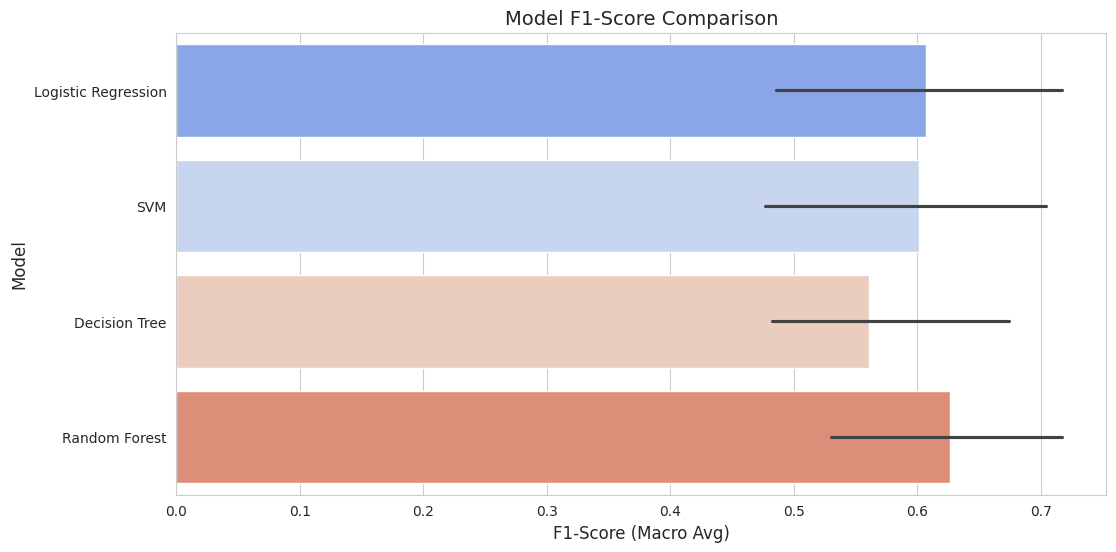

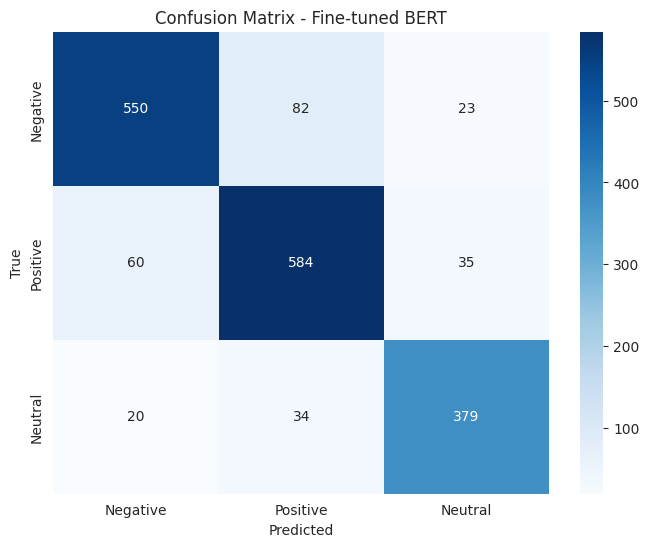

In [ ]:
# Convert results to DataFrame
df_comparison1 = pd.DataFrame(model_performance)

# Print model comparison table
print("\n### Model Performance Comparison ###")
print(df_comparison1)

# **Plot Accuracy Comparison**
plt.figure(figsize=(12, 6))
sns.barplot(x="Accuracy", y="Model", data=df_comparison1, palette="viridis")
plt.xlabel("Accuracy", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.title("Model Accuracy Comparison", fontsize=14)
plt.show()

# **Plot F1-Score (Macro Avg) Comparison**
plt.figure(figsize=(12, 6))
sns.barplot(x="F1-Score (Macro Avg)", y="Model", data=df_comparison1, palette="coolwarm")
plt.xlabel("F1-Score (Macro Avg)", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.title("Model F1-Score Comparison", fontsize=14)
plt.show()

# **Plot Confusion Matrix for Fine-tuned BERT**
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive", "Neutral"], yticklabels=["Negative", "Positive", "Neutral"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Fine-tuned BERT")
plt.show()

In [ ]:
df_comparison_bert.head()

,Model,Accuracy,Precision (Macro Avg),Recall (Macro Avg),F1-Score (Macro Avg),Precision (Weighted Avg),Recall (Weighted Avg),F1-Score (Weighted Avg)
0,Logistic Regression,0.654216,0.653094,0.660305,0.655824,0.654093,0.654216,0.653411
1,SVM,0.640634,0.639071,0.645620,0.641531,0.640403,0.640634,0.639815
2,Decision Tree,0.528580,0.530299,0.525997,0.527786,0.529273,0.528580,0.528614
3,Random Forest,0.612903,0.627778,0.602323,0.608809,0.619473,0.612903,0.610399
4,Fine-tuned BERT,0.856254,0.863312,0.852938,0.857327,0.857846,0.856254,0.856394


In [ ]:
# prompt: add a column Tokenization and have all the data filled as Bert

# Assuming df_comparison is already created as in your original code

# Add the 'Tokenization' column and fill it with 'Bert'
df_comparison_bert['Tokenization'] = 'Bert'

# The rest of your code remains the same...



### Final Model Performance Comparison (Including BERT) ###
   Tokenization                Model  Accuracy  Precision (Macro Avg)  \
0        TF-IDF  Logistic Regression  0.720996               0.716961   
1        TF-IDF                  SVM  0.707980               0.702674   
2        TF-IDF        Decision Tree  0.672326               0.671237   
3        TF-IDF        Random Forest  0.715337               0.715852   
4      Word2Vec  Logistic Regression  0.490662               0.497400   
5      Word2Vec                  SVM  0.481607               0.526422   
6      Word2Vec        Decision Tree  0.441426               0.440777   
7      Word2Vec        Random Forest  0.536503               0.557472   
8         GloVe  Logistic Regression  0.634975               0.627757   
9         GloVe                  SVM  0.633843               0.629927   
10        GloVe        Decision Tree  0.526316               0.527313   
11        GloVe        Random Forest  0.637238               0.

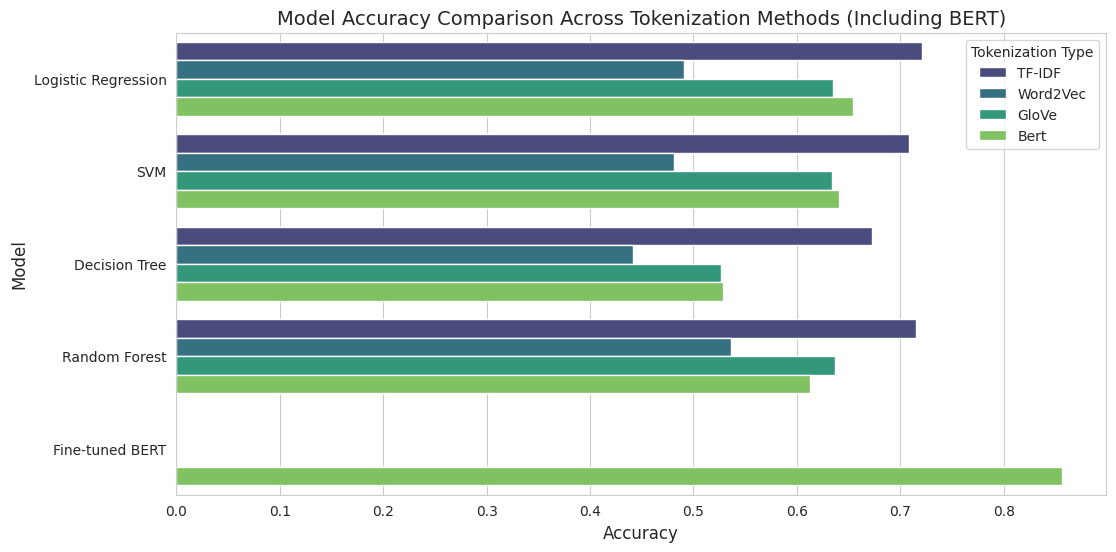

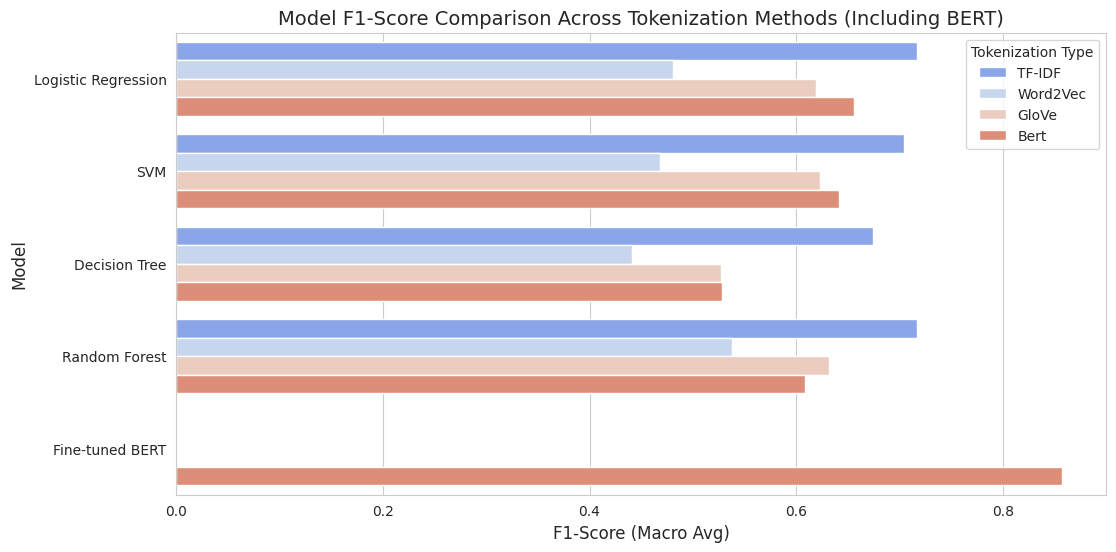

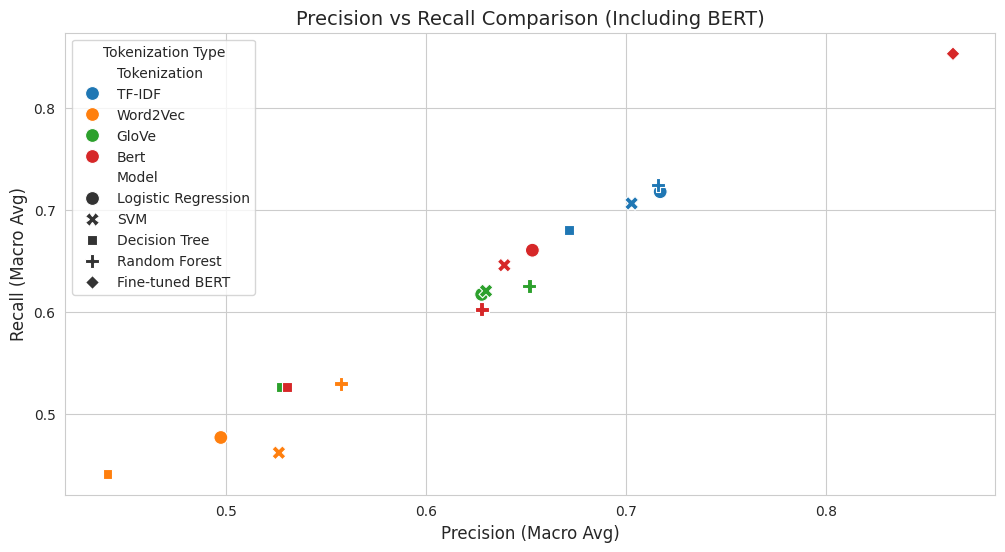

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

if 'df_comparison_bert' in globals():
    df_final_comparison = pd.concat([df_comparison, df_comparison_bert], ignore_index=True)
else:
    df_final_comparison = df_comparison.copy()

# Print Final Model Performance Table
print("\n### Final Model Performance Comparison (Including BERT) ###")
print(df_final_comparison)

# Set plot style
sns.set_style("whitegrid")

# **Plot Accuracy Comparison**
plt.figure(figsize=(12, 6))
sns.barplot(x="Accuracy", y="Model", hue="Tokenization", data=df_final_comparison, palette="viridis")
plt.xlabel("Accuracy", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.title("Model Accuracy Comparison Across Tokenization Methods (Including BERT)", fontsize=14)
plt.legend(title="Tokenization Type", fontsize=10)
plt.show()

# **Plot F1-Score (Macro Avg) Comparison**
plt.figure(figsize=(12, 6))
sns.barplot(x="F1-Score (Macro Avg)", y="Model", hue="Tokenization", data=df_final_comparison, palette="coolwarm")
plt.xlabel("F1-Score (Macro Avg)", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.title("Model F1-Score Comparison Across Tokenization Methods (Including BERT)", fontsize=14)
plt.legend(title="Tokenization Type", fontsize=10)
plt.show()

# **Plot Precision vs Recall (Macro Avg)**
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Precision (Macro Avg)", y="Recall (Macro Avg)", hue="Tokenization", style="Model", data=df_final_comparison, s=100)
plt.xlabel("Precision (Macro Avg)", fontsize=12)
plt.ylabel("Recall (Macro Avg)", fontsize=12)
plt.title("Precision vs Recall Comparison (Including BERT)", fontsize=14)
plt.legend(title="Tokenization Type", fontsize=10)
plt.show()


In [ ]:
df_comparison.head()

,Tokenization,Model,Accuracy,Precision (Macro Avg),Recall (Macro Avg),F1-Score (Macro Avg),Precision (Weighted Avg),Recall (Weighted Avg),F1-Score (Weighted Avg)
0,TF-IDF,Logistic Regression,0.720996,0.716961,0.717651,0.717222,0.721657,0.720996,0.721246
1,TF-IDF,SVM,0.707980,0.702674,0.706176,0.703938,0.710235,0.707980,0.708694
2,TF-IDF,Decision Tree,0.672326,0.671237,0.680490,0.674317,0.673433,0.672326,0.671455
3,TF-IDF,Random Forest,0.715337,0.715852,0.724256,0.716971,0.719688,0.715337,0.714805
4,Word2Vec,Logistic Regression,0.490662,0.497400,0.476727,0.480883,0.493769,0.490662,0.486897


In [ ]:
df_comparison1.head()

,Tokenization,Model,Accuracy,Precision (Macro Avg),Recall (Macro Avg),F1-Score (Macro Avg),Precision (Weighted Avg),Recall (Weighted Avg),F1-Score (Weighted Avg)
0,TF-IDF,Logistic Regression,0.720996,0.716961,0.717651,0.717222,0.721657,0.720996,0.721246
1,TF-IDF,SVM,0.707980,0.702674,0.706176,0.703938,0.710235,0.707980,0.708694
2,TF-IDF,Decision Tree,0.672326,0.671237,0.680490,0.674317,0.673433,0.672326,0.671455
3,TF-IDF,Random Forest,0.715337,0.715852,0.724256,0.716971,0.719688,0.715337,0.714805
4,Word2Vec,Logistic Regression,0.496321,0.504748,0.481319,0.485631,0.500520,0.496321,0.492035


In [ ]:
# prompt: df_final_comparison export to csv

df_final_comparison.to_csv('df_final_comparison.csv', index=False)
